<br>

## 1. Data loading & preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bank_df = pd.read_csv("bank.csv")
bank_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [18]:
def total_change(change_col):
    uni_list = bank_df[change_col].unique().tolist()
    for i in range(len(uni_list)):
        bank_df.loc[(bank_df[change_col] == uni_list[i]), change_col+"_group"] = i+1
        
        

In [15]:
total_change("job")

In [16]:
bank_df.job_group

0        1.0
1        1.0
2        2.0
3        3.0
4        1.0
        ... 
11157    6.0
11158    3.0
11159    2.0
11160    2.0
11161    2.0
Name: job_group, Length: 11162, dtype: float64

In [20]:
total_change("marital")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,job_group,marital_group
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1.0,1.0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1.0,1.0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2.0,1.0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3.0,1.0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,6.0,2.0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,3.0,1.0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,2.0,2.0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,2.0,1.0


In [22]:
del bank_df["job"]

In [23]:
del bank_df["marital"]

In [24]:
bank_df

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,job_group,marital_group
0,59,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1.0,1.0
1,56,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1.0,1.0
2,41,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2.0,1.0
3,55,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3.0,1.0
4,54,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,6.0,2.0
11158,39,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,3.0,1.0
11159,32,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,2.0,2.0
11160,43,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,2.0,1.0


In [25]:
total_change("education")
total_change("housing")
total_change("loan")

In [26]:
del bank_df["education"]
del bank_df["housing"]
del bank_df["loan"]

In [27]:
bank_df

,age,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,job_group,marital_group,education_group,housing_group,loan_group
0,59,no,2343,unknown,5,may,1042,1,-1,0,unknown,yes,1.0,1.0,1.0,1.0,1.0
1,56,no,45,unknown,5,may,1467,1,-1,0,unknown,yes,1.0,1.0,1.0,2.0,1.0
2,41,no,1270,unknown,5,may,1389,1,-1,0,unknown,yes,2.0,1.0,1.0,1.0,1.0
3,55,no,2476,unknown,5,may,579,1,-1,0,unknown,yes,3.0,1.0,1.0,1.0,1.0
4,54,no,184,unknown,5,may,673,2,-1,0,unknown,yes,1.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,no,1,cellular,20,apr,257,1,-1,0,unknown,no,6.0,2.0,3.0,1.0,1.0
11158,39,no,733,unknown,16,jun,83,4,-1,0,unknown,no,3.0,1.0,1.0,2.0,1.0
11159,32,no,29,cellular,19,aug,156,2,-1,0,unknown,no,2.0,2.0,1.0,2.0,1.0
11160,43,no,0,cellular,8,may,9,2,172,5,failure,no,2.0,1.0,1.0,2.0,2.0


In [28]:
total_change("contact")
del bank_df["contact"]
bank_df

,age,default,balance,day,month,duration,campaign,pdays,previous,poutcome,deposit,job_group,marital_group,education_group,housing_group,loan_group,contact_group
0,59,no,2343,5,may,1042,1,-1,0,unknown,yes,1.0,1.0,1.0,1.0,1.0,1.0
1,56,no,45,5,may,1467,1,-1,0,unknown,yes,1.0,1.0,1.0,2.0,1.0,1.0
2,41,no,1270,5,may,1389,1,-1,0,unknown,yes,2.0,1.0,1.0,1.0,1.0,1.0
3,55,no,2476,5,may,579,1,-1,0,unknown,yes,3.0,1.0,1.0,1.0,1.0,1.0
4,54,no,184,5,may,673,2,-1,0,unknown,yes,1.0,1.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,no,1,20,apr,257,1,-1,0,unknown,no,6.0,2.0,3.0,1.0,1.0,2.0
11158,39,no,733,16,jun,83,4,-1,0,unknown,no,3.0,1.0,1.0,2.0,1.0,1.0
11159,32,no,29,19,aug,156,2,-1,0,unknown,no,2.0,2.0,1.0,2.0,1.0,2.0
11160,43,no,0,8,may,9,2,172,5,failure,no,2.0,1.0,1.0,2.0,2.0,2.0


In [31]:
bank_df["age"].describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [47]:
# age_grouping
bank_df.loc[bank_df["age"] <= 20, "age_group"] = 1 # 20대 미만
bank_df.loc[(bank_df["age"] > 20) & (bank_df["age"] <= 26), "age_group"] = 2 # 20대 초반
bank_df.loc[(bank_df["age"] > 26) & (bank_df["age"] <= 30), "age_group"] = 3 # 20대 후반
bank_df.loc[(bank_df["age"] > 30) & (bank_df["age"] <= 36), "age_group"] = 4 # 30대 초반
bank_df.loc[(bank_df["age"] > 36) & (bank_df["age"] <= 40), "age_group"] = 5 # 30대 후반
bank_df.loc[(bank_df["age"] > 40) & (bank_df["age"] <= 46), "age_group"] = 6 # 40대 초반
bank_df.loc[(bank_df["age"] > 46) & (bank_df["age"] <= 50), "age_group"] = 7 # 40대 후반
bank_df.loc[(bank_df["age"] > 50) & (bank_df["age"] <= 60), "age_group"] = 8 # 50대
bank_df.loc[bank_df["age"] > 60, "age_group"] = 9 # 60대 이상

In [49]:
bank_df["age_group"].value_counts()

4.0    2796
8.0    1860
6.0    1592
5.0    1392
3.0    1322
7.0     904
2.0     644
9.0     611
1.0      41
Name: age_group, dtype: int64

In [50]:
del bank_df["age"]

In [51]:
bank_df

,default,balance,day,month,duration,campaign,pdays,previous,poutcome,deposit,job_group,marital_group,education_group,housing_group,loan_group,contact_group,age_group
0,no,2343,5,may,1042,1,-1,0,unknown,yes,1.0,1.0,1.0,1.0,1.0,1.0,8.0
1,no,45,5,may,1467,1,-1,0,unknown,yes,1.0,1.0,1.0,2.0,1.0,1.0,8.0
2,no,1270,5,may,1389,1,-1,0,unknown,yes,2.0,1.0,1.0,1.0,1.0,1.0,6.0
3,no,2476,5,may,579,1,-1,0,unknown,yes,3.0,1.0,1.0,1.0,1.0,1.0,8.0
4,no,184,5,may,673,2,-1,0,unknown,yes,1.0,1.0,2.0,2.0,1.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,no,1,20,apr,257,1,-1,0,unknown,no,6.0,2.0,3.0,1.0,1.0,2.0,4.0
11158,no,733,16,jun,83,4,-1,0,unknown,no,3.0,1.0,1.0,2.0,1.0,1.0,5.0
11159,no,29,19,aug,156,2,-1,0,unknown,no,2.0,2.0,1.0,2.0,1.0,2.0,4.0
11160,no,0,8,may,9,2,172,5,failure,no,2.0,1.0,1.0,2.0,2.0,2.0,6.0


In [52]:
total_change("default")
total_change("deposit")
del bank_df["default"]
del bank_df["deposit"]
bank_df

,balance,day,month,duration,campaign,pdays,previous,poutcome,job_group,marital_group,education_group,housing_group,loan_group,contact_group,age_group,default_group,deposit_group
0,2343,5,may,1042,1,-1,0,unknown,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0
1,45,5,may,1467,1,-1,0,unknown,1.0,1.0,1.0,2.0,1.0,1.0,8.0,1.0,1.0
2,1270,5,may,1389,1,-1,0,unknown,2.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0
3,2476,5,may,579,1,-1,0,unknown,3.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0
4,184,5,may,673,2,-1,0,unknown,1.0,1.0,2.0,2.0,1.0,1.0,8.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,20,apr,257,1,-1,0,unknown,6.0,2.0,3.0,1.0,1.0,2.0,4.0,1.0,2.0
11158,733,16,jun,83,4,-1,0,unknown,3.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,2.0
11159,29,19,aug,156,2,-1,0,unknown,2.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0
11160,0,8,may,9,2,172,5,failure,2.0,1.0,1.0,2.0,2.0,2.0,6.0,1.0,2.0


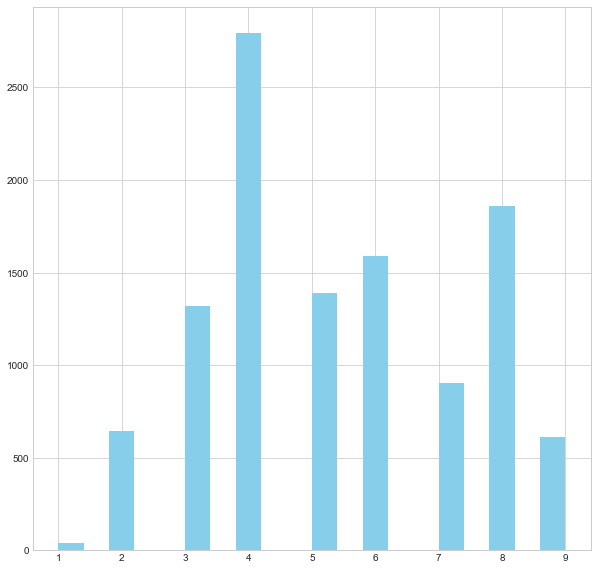

In [53]:
plt.style.use('seaborn-whitegrid')

bank_df["age_group"].hist(bins = 20, figsize=(10,10), color = 'skyblue')
plt.show()

In [ ]:
min_on_training = X_train.min(axis=0) # 열마다의 최소값 계산
range_on_training = (X_train - min_on_training).max(axis=0) # 분모에 해당 
X_train_scaled = (X_train - min_on_training) / range_on_training # Min-max scaling (0~1)

print("열마다의 최소값\n {}".format(X_train_scaled.min(axis=0)))
print("열마다의 최대값\n {}".format(X_train_scaled.max(axis=0)))

In [58]:
bal_max=bank_df["balance"].max()
bal_min=bank_df["balance"].min()

### Min-Max Scaling

In [59]:

def min_max(change_col):
    max=bank_df[change_col].max()
    min=bank_df[change_col].min()
    bank_df["mm"+change_col]=(bank_df[change_col]-min)/(max-min)
    

In [60]:
min_max("balance")
bank_df

,balance,day,month,duration,campaign,pdays,previous,poutcome,job_group,marital_group,education_group,housing_group,loan_group,contact_group,age_group,default_group,deposit_group,mmbalance
0,2343,5,may,1042,1,-1,0,unknown,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,0.104371
1,45,5,may,1467,1,-1,0,unknown,1.0,1.0,1.0,2.0,1.0,1.0,8.0,1.0,1.0,0.078273
2,1270,5,may,1389,1,-1,0,unknown,2.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,0.092185
3,2476,5,may,579,1,-1,0,unknown,3.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,0.105882
4,184,5,may,673,2,-1,0,unknown,1.0,1.0,2.0,2.0,1.0,1.0,8.0,1.0,1.0,0.079851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,20,apr,257,1,-1,0,unknown,6.0,2.0,3.0,1.0,1.0,2.0,4.0,1.0,2.0,0.077773
11158,733,16,jun,83,4,-1,0,unknown,3.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,2.0,0.086086
11159,29,19,aug,156,2,-1,0,unknown,2.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,0.078091
11160,0,8,may,9,2,172,5,failure,2.0,1.0,1.0,2.0,2.0,2.0,6.0,1.0,2.0,0.077762


In [61]:
del bank_df["balance"]

In [62]:
total_change("day")
total_change("month")
total_change("poutcome")
min_max("duration")
del bank_df["day"]
del bank_df["month"]
del bank_df["poutcome"]
del bank_df["duration"]

bank_df

,campaign,pdays,previous,job_group,marital_group,education_group,housing_group,loan_group,contact_group,age_group,default_group,deposit_group,mmbalance,day_group,month_group,poutcome_group,mmduration
0,1,-1,0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,0.104371,1.0,1.0,1.0,0.268110
1,1,-1,0,1.0,1.0,1.0,2.0,1.0,1.0,8.0,1.0,1.0,0.078273,1.0,1.0,1.0,0.377675
2,1,-1,0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,0.092185,1.0,1.0,1.0,0.357566
3,1,-1,0,3.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,0.105882,1.0,1.0,1.0,0.148750
4,2,-1,0,1.0,1.0,2.0,2.0,1.0,1.0,8.0,1.0,1.0,0.079851,1.0,1.0,1.0,0.172983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,-1,0,6.0,2.0,3.0,1.0,1.0,2.0,4.0,1.0,2.0,0.077773,12.0,11.0,1.0,0.065739
11158,4,-1,0,3.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,2.0,0.086086,10.0,2.0,1.0,0.020882
11159,2,-1,0,2.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,0.078091,11.0,4.0,1.0,0.039701
11160,2,172,5,2.0,1.0,1.0,2.0,2.0,2.0,6.0,1.0,2.0,0.077762,4.0,1.0,3.0,0.001805


In [101]:
bank_df["deposit_group"].unique()

array([1., 2.])

In [64]:
min_max("pdays")
del bank_df["pdays"]

bank_df

,campaign,previous,job_group,marital_group,education_group,housing_group,loan_group,contact_group,age_group,default_group,deposit_group,mmbalance,day_group,month_group,poutcome_group,mmduration,mmpdays
0,1,0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,0.104371,1.0,1.0,1.0,0.268110,0.000000
1,1,0,1.0,1.0,1.0,2.0,1.0,1.0,8.0,1.0,1.0,0.078273,1.0,1.0,1.0,0.377675,0.000000
2,1,0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,0.092185,1.0,1.0,1.0,0.357566,0.000000
3,1,0,3.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,0.105882,1.0,1.0,1.0,0.148750,0.000000
4,2,0,1.0,1.0,2.0,2.0,1.0,1.0,8.0,1.0,1.0,0.079851,1.0,1.0,1.0,0.172983,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,6.0,2.0,3.0,1.0,1.0,2.0,4.0,1.0,2.0,0.077773,12.0,11.0,1.0,0.065739,0.000000
11158,4,0,3.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,2.0,0.086086,10.0,2.0,1.0,0.020882,0.000000
11159,2,0,2.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,0.078091,11.0,4.0,1.0,0.039701,0.000000
11160,2,5,2.0,1.0,1.0,2.0,2.0,2.0,6.0,1.0,2.0,0.077762,4.0,1.0,3.0,0.001805,0.202339


In [109]:
uni_list = bank_df["deposit_group"].unique().tolist()
for i in range(len(uni_list)):
    bank_df.loc[(bank_df["deposit_group"] == uni_list[i]), "deposit_group"] = i
        

bank_df

,campaign,previous,job_group,marital_group,education_group,housing_group,loan_group,contact_group,age_group,default_group,deposit_group,mmbalance,day_group,month_group,poutcome_group,mmduration,mmpdays
0,1,0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.104371,1.0,1.0,1.0,0.268110,0.000000
1,1,0,1.0,1.0,1.0,2.0,1.0,1.0,8.0,1.0,0.0,0.078273,1.0,1.0,1.0,0.377675,0.000000
2,1,0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.092185,1.0,1.0,1.0,0.357566,0.000000
3,1,0,3.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.105882,1.0,1.0,1.0,0.148750,0.000000
4,2,0,1.0,1.0,2.0,2.0,1.0,1.0,8.0,1.0,0.0,0.079851,1.0,1.0,1.0,0.172983,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,6.0,2.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,0.077773,12.0,11.0,1.0,0.065739,0.000000
11158,4,0,3.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,1.0,0.086086,10.0,2.0,1.0,0.020882,0.000000
11159,2,0,2.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,0.078091,11.0,4.0,1.0,0.039701,0.000000
11160,2,5,2.0,1.0,1.0,2.0,2.0,2.0,6.0,1.0,1.0,0.077762,4.0,1.0,3.0,0.001805,0.202339


In [119]:
del bank_df["day_group"]
del bank_df["month_group"]
del bank_df["contact_group"]

In [131]:
del bank_df["campaign"]
del bank_df["previous"]
bank_df

,job_group,marital_group,education_group,housing_group,loan_group,age_group,default_group,deposit_group,mmbalance,poutcome_group,mmduration,mmpdays
0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.104371,1.0,0.268110,0.000000
1,1.0,1.0,1.0,2.0,1.0,8.0,1.0,0.0,0.078273,1.0,0.377675,0.000000
2,2.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.092185,1.0,0.357566,0.000000
3,3.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.105882,1.0,0.148750,0.000000
4,1.0,1.0,2.0,2.0,1.0,8.0,1.0,0.0,0.079851,1.0,0.172983,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
11157,6.0,2.0,3.0,1.0,1.0,4.0,1.0,1.0,0.077773,1.0,0.065739,0.000000
11158,3.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.086086,1.0,0.020882,0.000000
11159,2.0,2.0,1.0,2.0,1.0,4.0,1.0,1.0,0.078091,1.0,0.039701,0.000000
11160,2.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,0.077762,3.0,0.001805,0.202339


In [138]:
del bank_df["mmpdays"]
bank_df

,job_group,marital_group,education_group,housing_group,loan_group,age_group,default_group,deposit_group,mmbalance,poutcome_group,mmduration
0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.104371,1.0,0.268110
1,1.0,1.0,1.0,2.0,1.0,8.0,1.0,0.0,0.078273,1.0,0.377675
2,2.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.092185,1.0,0.357566
3,3.0,1.0,1.0,1.0,1.0,8.0,1.0,0.0,0.105882,1.0,0.148750
4,1.0,1.0,2.0,2.0,1.0,8.0,1.0,0.0,0.079851,1.0,0.172983
...,...,...,...,...,...,...,...,...,...,...,...
11157,6.0,2.0,3.0,1.0,1.0,4.0,1.0,1.0,0.077773,1.0,0.065739
11158,3.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.086086,1.0,0.020882
11159,2.0,2.0,1.0,2.0,1.0,4.0,1.0,1.0,0.078091,1.0,0.039701
11160,2.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,0.077762,3.0,0.001805


In [139]:
from sklearn import model_selection

bank_target = bank_df[['deposit_group']].copy()
bank_data = bank_df.copy()
del bank_data['deposit_group']




train_data, test_data, train_label, test_label = model_selection.train_test_split(bank_data, bank_target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)



# from sklearn.preprocessing import StandardScaler  # (sklearn.preprocessing.MinMaxScaler is also available)

# sc = StandardScaler() 
# # sc = MinMaxScaler()
# sc.fit(train_data) # X_train 의 평균과 표준편차를 구함

# As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set).
# train_data = sc.transform(train_data)
# test_data = sc.transform(test_data)
# df = pd.DataFrame(train_data)
# df.describe()
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(7813, 10)
(3349, 10)
(7813, 1)
(3349, 1)


In [140]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [141]:
model = models.Sequential() 

# 레이어 쌓기
model.add(layers.Dense(input_dim=10, units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1

In [142]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.sparse_categorical_crossentropy, # y_data가 one hot vector가 아닐ㄱ때 사용
              metrics=[metrics.categorical_accuracy]) 

In [143]:
history = model.fit(train_data, train_label, batch_size=100, epochs=100, validation_split=0.3) 

Train on 5469 samples, validate on 2344 samples
Epoch 1/100
5469/5469 [==============================] - 1s 195us/sample - loss: 1.1846 - categorical_accuracy: 0.4723 - val_loss: 0.6656 - val_categorical_accuracy: 0.3520
Epoch 2/100
5469/5469 [==============================] - 0s 89us/sample - loss: 0.7901 - categorical_accuracy: 0.4685 - val_loss: 0.5487 - val_categorical_accuracy: 0.5013
Epoch 3/100
5469/5469 [==============================] - 0s 89us/sample - loss: 0.6428 - categorical_accuracy: 0.4577 - val_loss: 0.5432 - val_categorical_accuracy: 0.4996
Epoch 4/100
5469/5469 [==============================] - 0s 90us/sample - loss: 0.5997 - categorical_accuracy: 0.4628 - val_loss: 0.5400 - val_categorical_accuracy: 0.4629
Epoch 5/100
5469/5469 [==============================] - 0s 87us/sample - loss: 0.5631 - categorical_accuracy: 0.4683 - val_loss: 0.5056 - val_categorical_accuracy: 0.5179
Epoch 6/100
5469/5469 [==============================] - 0s 89us/sample - loss: 0.5318 - ca

5469/5469 [==============================] - 0s 88us/sample - loss: 0.4382 - categorical_accuracy: 0.4900 - val_loss: 0.4541 - val_categorical_accuracy: 0.4953
Epoch 49/100
5469/5469 [==============================] - 0s 86us/sample - loss: 0.4346 - categorical_accuracy: 0.4891 - val_loss: 0.4661 - val_categorical_accuracy: 0.4876
Epoch 50/100
5469/5469 [==============================] - 0s 85us/sample - loss: 0.4373 - categorical_accuracy: 0.4856 - val_loss: 0.4613 - val_categorical_accuracy: 0.5538
Epoch 51/100
5469/5469 [==============================] - 0s 86us/sample - loss: 0.4342 - categorical_accuracy: 0.4915 - val_loss: 0.4598 - val_categorical_accuracy: 0.4808
Epoch 52/100
5469/5469 [==============================] - 0s 85us/sample - loss: 0.4407 - categorical_accuracy: 0.4893 - val_loss: 0.4908 - val_categorical_accuracy: 0.4394
Epoch 53/100
5469/5469 [==============================] - 0s 85us/sample - loss: 0.4429 - categorical_accuracy: 0.4847 - val_loss: 0.4647 - val_cate

5469/5469 [==============================] - 0s 85us/sample - loss: 0.4317 - categorical_accuracy: 0.4860 - val_loss: 0.4744 - val_categorical_accuracy: 0.4672
Epoch 96/100
5469/5469 [==============================] - 0s 85us/sample - loss: 0.4185 - categorical_accuracy: 0.4749 - val_loss: 0.5103 - val_categorical_accuracy: 0.5316
Epoch 97/100
5469/5469 [==============================] - 0s 85us/sample - loss: 0.4166 - categorical_accuracy: 0.4897 - val_loss: 0.4646 - val_categorical_accuracy: 0.4701
Epoch 98/100
5469/5469 [==============================] - 0s 85us/sample - loss: 0.4129 - categorical_accuracy: 0.4856 - val_loss: 0.4981 - val_categorical_accuracy: 0.5572
Epoch 99/100
5469/5469 [==============================] - 0s 85us/sample - loss: 0.4135 - categorical_accuracy: 0.4908 - val_loss: 0.4897 - val_categorical_accuracy: 0.5192
Epoch 100/100
5469/5469 [==============================] - 0s 86us/sample - loss: 0.4041 - categorical_accuracy: 0.4794 - val_loss: 0.4821 - val_cat